In [35]:
from pytorch_grad_cam import GradCAM,AblationCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import torch
import torch.nn as nn
from torchvision.transforms import Compose,Normalize,ToTensor
from torchvision import transforms
from torchvision.models import resnet34
import os
import time
from PIL import Image

# 1. 히트맵 만들기

In [7]:
model = resnet34(pretrained=False)
model

c:\POTENUP\08_Deep_Learning_Analysis_Study\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\POTENUP\08_Deep_Learning_Analysis_Study\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
model.fc = nn.Linear(512,3,bias=True)
model.load_state_dict(torch.load('../model/mymodel.pth',map_location='cpu'))
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
image = Image.open('./data/다운로드.jpeg')
transforms_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

input_img = transforms_test(image).unsqueeze(0)
input_img.shape

torch.Size([1, 3, 224, 224])

In [31]:
layer = model.layer4[2].conv2

targets = [ClassifierOutputTarget(1)]

layer


Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [36]:
cam = AblationCAM(model=model, target_layers=[layer])
cam.batch_size = 1
grayscale_cam =cam(input_tensor=input_img, targets=targets)
grayscale_cam = grayscale_cam[0,:]
grayscale_cam

100%|██████████| 512/512 [00:19<00:00, 25.92it/s]


array([[0.05430331, 0.05430331, 0.05430331, ..., 0.30495456, 0.30495456,
        0.30495456],
       [0.05430331, 0.05430331, 0.05430331, ..., 0.30495456, 0.30495456,
        0.30495456],
       [0.05430331, 0.05430331, 0.05430331, ..., 0.30495456, 0.30495456,
        0.30495456],
       ...,
       [0.03589676, 0.03589676, 0.03589676, ..., 0.        , 0.        ,
        0.        ],
       [0.03589676, 0.03589676, 0.03589676, ..., 0.        , 0.        ,
        0.        ],
       [0.03589676, 0.03589676, 0.03589676, ..., 0.        , 0.        ,
        0.        ]], shape=(224, 224), dtype=float32)

In [38]:
grayscale_cam.max()

np.float32(0.9999999)

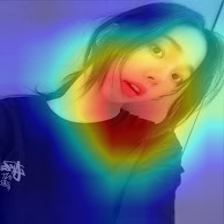

In [39]:
image = Image.open('./data/다운로드.jpeg')
image = image.resize((224,224))
rgb_img = np.float32(image)/255
result_grad_cam = show_cam_on_image(rgb_img,grayscale_cam,use_rgb=True)
display(Image.fromarray(result_grad_cam))